In [1]:
# Import DEAP and other necessary modules
import random
import numpy as np
from deap import base, creator, tools, algorithms
import support  # support.py contains the fitness function and domain specifics

In [2]:
# Known parameters by PETRINAS
NR_PLACES = 9          # Number of places in the Petri net 
NR_TRANSITIONS = len(support.activities)  # Number of transitions (including invisible)

### Step 1

In [3]:
# Define the GA individual and fitness using DEAP's creator
creator.create("FitnessMax", base.Fitness, weights=(1.0,))       # Maximization (weight 1.0)
creator.create("Individual", list, fitness=creator.FitnessMax)   # Individual is a list (of place indices)

### Step 2: setting up the toolbox and specifying the genetic operators

In [4]:
# Create a toolbox for genetic operations
toolbox = base.Toolbox()

toolbox.register("evaluate", support.fitness)                     # Register the evaluation function using the provided fitness function from support.py
toolbox.register("mate", tools.cxTwoPoint)                        # Two-point crossover
toolbox.register("mutate",
                 tools.mutUniformInt,
                 low = 0,                                         # minimum place index
                 up = NR_PLACES - 1,                              # maximum place index (8)
                 indpb = 0.05)                                    # 5 % chance to mutate each gene
toolbox.register("select", tools.selTournament, tournsize=3)      # Tournament selection (size 3)

### Step 3: specify the generators

In [5]:
toolbox.register("attr_place", random.randint, 0, NR_PLACES-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_place, n=2*NR_TRANSITIONS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

### Step 4: create an initial population

In [6]:
pop = toolbox.population(n=50)

### Step 5: perform an optimization

In [7]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10)

gen	nevals
0  	50    
1  	34    
2  	37    
3  	34    
4  	37    
5  	24    
6  	28    
7  	29    
8  	18    
9  	33    
10 	31    


### Step 6: checking the performances [1/3]

In [8]:
hof = tools.HallOfFame(1) 
stats = tools.Statistics(lambda ind: ind.fitness.values) 
stats.register("avg", np.mean) 
stats.register("std", np.std) 
stats.register("min", np.min) 
stats.register("max", np.max)
pop, log = algorithms.eaSimple(pop, toolbox, stats=stats, halloffame=hof, cxpb=0.5, mutpb=0.2, ngen=40)

gen	nevals	avg     	std     	min     	max     
0  	0     	0.229391	0.475996	-2.65324	0.478469
1  	34    	0.279928	0.334664	-1.65324	0.478469
2  	30    	0.148759	0.68239 	-2.65324	0.478469
3  	30    	0.294586	0.457566	-1.65324	0.478469
4  	38    	0.441591	0.14415 	-0.521531	0.478469
5  	25    	0.415835	0.310522	-1.52153 	0.478469
6  	28    	0.318894	0.577664	-2.52153 	0.478469
7  	35    	0.341352	0.435985	-1.52153 	0.478469
8  	33    	0.289259	0.672065	-3.65324 	0.47976 
9  	35    	0.197833	0.969731	-4.65324 	0.47976 
10 	21    	0.340009	0.563908	-2.52153 	0.496427
11 	35    	0.333167	0.538699	-2.52153 	0.496427
12 	34    	0.355907	0.636345	-3       	0.496427
13 	29    	0.271213	0.701878	-2.50357 	0.513094
14 	27    	0.345139	0.584613	-3       	0.513094
15 	32    	0.39447 	0.370294	-1.55415 	0.513094
16 	34    	0.37876 	0.380634	-1.48691 	0.513094
17 	30    	0.318296	0.526449	-2.50357 	0.513094
18 	32    	0.364166	0.464245	-1.64995 	0.513094
19 	27    	0.440437	0.244262	-0.52024 	0.5130

### Step 6: checking the performances [2/3]

In [10]:
print(hof, support.fitness(hof[0]))

[[4, 5, 2, 1, 5, 8, 0, 4, 4, 8, 3, 4, 3, 8, 4, 7, 0, 4, 0, 4, 4, 7, 0, 4]] (0.5130937950937947,)


### Step 6: checking the performances [3/3]

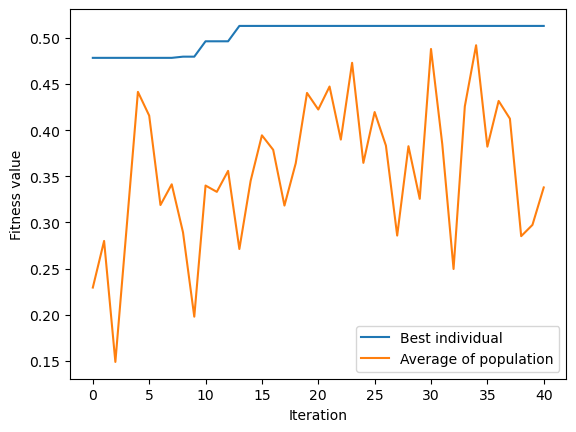

In [11]:
from matplotlib.pyplot import * 
xlabel("Iteration") 
ylabel("Fitness value") 
plot(log.select('max'), label="Best individual")
plot(log.select('avg'), label="Average of population")
legend() 
show()